<a href="https://colab.research.google.com/github/r3writes/KeithGalli-Pandas-Data-Science-Tasks/blob/master/Playing_with_Sales_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

Merge monthly sales data into one annual sales dataset

In [26]:
#1. Get file names
#-----------------
path = '/content/Sales_Data/' 
#### comment above path in GitHub and instead use the below path for data files
#path = './Sales_Data'
files = [file for file in os.listdir(path) if not file.startswith('.')]


#2. Create an empty master dataset to merge all monthly data into
#----------------------------------------------------------------
data_2019 = pd.DataFrame()


#3. Read each file into the master dataset
#-----------------------------------------
for file in files:

#### remove the below if condition in prod code. 
#### This is specific to my Colab folder. 
#  if file == 'sample_data':
#    break

  curr_data = pd.read_csv(path+file)
  data_2019 = pd.concat([data_2019, curr_data])

#4. Save data as a csv file.

data_2019.to_csv('alldata.csv', index = False)


Read the master dataset

In [108]:
mdata = pd.read_csv('alldata.csv')
mdata.count()

Order ID            372610
Product             372610
Quantity Ordered    372610
Price Each          372610
Order Date          372610
Purchase Address    372610
dtype: int64

Cleaning Data

In [109]:
#Remove duplicate headers present when we merged the monthly datasets
mdata = mdata[mdata['Order Date'] != 'Order Date']

#Remove missing values
mdata.dropna(inplace = True)
mdata.head(3)
mdata.dtypes
#mdata['Order Date'] = pd.to_datetime(mdata['Order Date'])

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

Convert columns from string to correct data types

In [110]:
#Convert columns into correct correct datatype
mdata['Order Date'] = pd.to_datetime(mdata['Order Date'])
mdata['Quantity Ordered'] = pd.to_numeric(mdata['Quantity Ordered'])
mdata['Price Each'] = pd.to_numeric(mdata['Price Each'])
mdata.dtypes



Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [111]:
mdata.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"


Add useful columns

In [114]:
#Extract month from 'Order Date' into a new 'Month' column
mdata['Date'] = pd.DatetimeIndex(mdata['Order Date']).date
mdata['Month'] = pd.DatetimeIndex(mdata['Order Date']).month

#Calculate Sales per order
mdata['Sales'] = mdata['Quantity Ordered'] * mdata['Price Each']

mdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Sales,Month
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",2019-12-30,1700.00,12
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",2019-12-29,600.00,12
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",2019-12-12,11.95,12
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",2019-12-22,149.99,12
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",2019-12-18,11.95,12


In [135]:
#Extract city from 'Purchase Address' column
def getcity(address):
  return address.split(',')[1].strip(" ")

def getstate(address):
  return address.split(',')[2].split(' ')[1]

mdata['City'] = mdata['Purchase Address'].apply(lambda x: f"{getcity(x)} ({getstate(x)})")
mdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Sales,Month,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",2019-12-30,1700.00,12,New York City (NY)
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",2019-12-29,600.00,12,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",2019-12-12,11.95,12,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",2019-12-22,149.99,12,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",2019-12-18,11.95,12,Atlanta (GA)


# Q1. What was the best month for sales? How much was earned that month?

In [76]:
#Aggregate data by month and sort by decending order of sales
mdata.groupby('Month')['Sales'].sum()
highest = mdata.groupby('Month')['Sales'].sum().max()

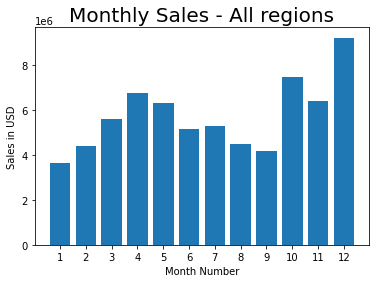

Month with highest sales is December.
Maximum sales was  9226886.68 USD.


In [86]:
#Plot monthly sales on a line graph
months = range(1,13)
plt.bar(months, mdata.groupby('Month')['Sales'].sum())
plt.title('Monthly Sales - All regions', size=20)
plt.xticks(months)
plt.xlabel('Month Number')
plt.ylabel('Sales in USD')
plt.show()

print("Month with highest sales is December.")
print("Maximum sales was ",highest, "USD.")

# Q2. What city sold the most product? 

In [95]:
#Aggregate data by city and sort by decending order of sales
mdata.groupby('City')['Sales'].sum()
maxi = mdata.groupby('City')['Sales'].sum().max()


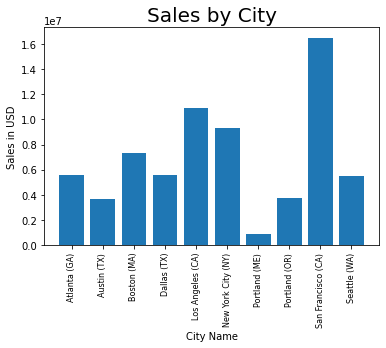

City with the highest sales is San Francisco (CA).
Maximum sales was  16524407.82 USD.


In [96]:
keys = [city for city, df in mdata.groupby(['City']) ]
plt.bar(keys, mdata.groupby('City')['Sales'].sum())
plt.title('Sales by City', size = 20)
plt.xticks(keys, rotation='vertical', size =8)
plt.xlabel('City Name')
plt.ylabel('Sales in USD')
plt.show()

print("City with the highest sales is San Francisco (CA).")
print("Maximum sales was ",maxi, "USD.")

# Q3. What time should we display advertisements to maximize likelihood of customer's buying product?

In [101]:
#Extract hours and minutes as separate columns from the 'Order Date' column
mdata['Hour'] = pd.DatetimeIndex(mdata['Order Date']).hour
mdata['Minutes'] = pd.DatetimeIndex(mdata['Order Date']).minute

mdata.groupby('Hour')['Product'].count()

Hour
0      7820
1      4700
2      2486
3      1662
4      1708
5      2642
6      4964
7      8022
8     12512
9     17496
10    21888
11    24822
12    25174
13    24258
14    21968
15    20350
16    20768
17    21798
18    24560
19    25810
20    24456
21    21842
22    17644
23    12550
Name: Product, dtype: int64

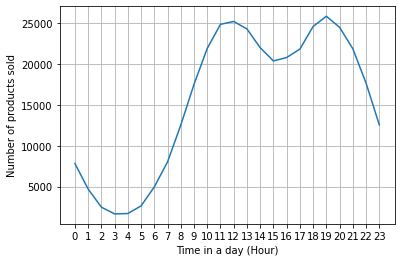

It is best to advertise between 11AM & 12 noon and between 6PM to 8PM to maximize customer purchase likelihood.


In [106]:
hrs = range(0,24)
plt.plot(hrs,mdata.groupby('Hour')['Product'].count())
plt.xlabel("Time in a day (Hour)")
plt.ylabel("Number of products sold")
plt.xticks(hrs)
plt.grid()
plt.show()

print("It is best to advertise between 11AM & 12 noon and between 6PM to 8PM to maximize customer purchase likelihood.")

# What is the least popular product? Where is it bought most?

In [167]:
mdata.groupby('Product')['Quantity Ordered'].count().sort_values()

Product
LG Dryer                       1292
LG Washing Machine             1332
Vareebadd Phone                4130
20in Monitor                   8202
ThinkPad Laptop                8256
Macbook Pro Laptop             9448
Flatscreen TV                  9600
Google Phone                  11050
34in Ultrawide Monitor        12362
27in 4K Gaming Monitor        12460
iPhone                        13684
27in FHD Monitor              15014
Bose SoundSport Headphones    26650
Apple Airpods Headphones      31098
Wired Headphones              37764
AA Batteries (4-pack)         41154
AAA Batteries (4-pack)        41282
Lightning Charging Cable      43316
USB-C Charging Cable          43806
Name: Quantity Ordered, dtype: int64

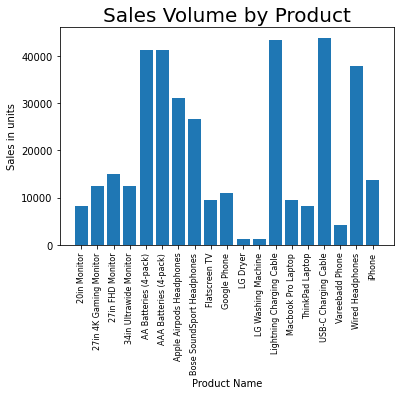

The least sold product is AAA Battery.


In [168]:
prod = [p for p, df in mdata.groupby(['Product'])]
plt.bar(prod, mdata.groupby('Product')['Quantity Ordered'].count())
plt.title('Sales Volume by Product',size=20)
plt.xticks(prod, rotation='vertical',size=8)
plt.xlabel('Product Name')
plt.ylabel('Sales in units')
plt.show()

print('The least sold product is LG dryer.')

In [166]:
mdata.groupby(['Product','City'])['Quantity Ordered'].sum()

Product       City              
20in Monitor  Atlanta (GA)           684
              Austin (TX)            460
              Boston (MA)            788
              Dallas (TX)            686
              Los Angeles (CA)      1316
                                    ... 
iPhone        New York City (NY)    1762
              Portland (ME)          158
              Portland (OR)          742
              San Francisco (CA)    3322
              Seattle (WA)          1092
Name: Quantity Ordered, Length: 190, dtype: int64

# Q4. What products are most often bought together?